<a href="https://colab.research.google.com/github/Dennis-LCLema/Sustainable-Tourism-Sring2025/blob/main/Bus_Electrification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Listed below are all the libraries you
# will need for this assignment. Run this
# code chunk everytime you open this file.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import io

In [20]:
# Fixed Parameters
#Simulation
num_simulations = 100  # Number of Simulations
num_years = 20    # Number of Years in each Simulation
minimum_daily_cruise_passengers = 5000
maximum_daily_cruise_passengers = 15000
minimum_daily_independent_tourist = 100
maximum_daily_independent_tourists = 1000
electric_bus_capacity = 80   # number of passengers an electric bus can carry comfortably.
tax_rate = 1.0   # a tax of $1.0 per passenger to fund the project.

#Bus parameters.
electric_bus_value = 825000           #average price of a new electric bus.
charging_equipment = 75000            #average cost of a new charging equipment that can charge 5 buses.
installation_cost = 30000             #average cost of installing a charging equipment.
cruise_passenger_transport = 0.375      #percentage of cruise passengers that use public transport.
independent_tourist_transport = 0.25    #percentage of independent passengers that use public transport.
buses_served_per_station = 5           #number of buses served by each charging station.

#Operating and maintenance costs.
charger_operational_cost = (6500/12/30) #average cost of operating a charging station per day.
gas_station_operating_cost = (2000/30)     #cost of operating a gas station per day for diesel buses.
electricity_cost_per_mile = 0.28  #the cost of electricity per mile for new electric buses.
fuel_cost_per_mile = 0.59  #the cost of fuel per mile for new diesel buses.
electric_bus_maintenance_cost = 0.55 #maintenace cost of an electric bus per mile.
diesel_bus_maintenance_cost = 1.53 #maintenace cost of a diesel bus per mile.
driver_salary = 45000  # average salary of a bus driber in Juneau.

#emission reduction.
diesel_bus_CO2 = 2680   #average grams of CO2 per mile relesaed by a diesel bus.
electric_bus_CO2 = 1209  #average grams of CO2 per mile relesaed by an electric bus.
distance = 11.7    #The distance from Juneau downtown to Mendenhall glacier is 11.7 miles.

#initialize lists for outputs.
tax_list = []  # Use a list to store taxes
initial_cost_of_electrifying_list = []  # Use a list to store intial cost of electrifying
electric_maintenance_and_operating_cost_list = []  # Use a list to store maintenance and operating costs
diesel_maintenance_and_operating_cost_list = []  # Use a list to store maintenance and operating costs
total_emission_reduction_list = []  # Use a list to store total emission reductions
total_savings_list = []  # Use a list to store total savings
total_electric_bus_CO2_list = []  # Use a list to store total CO2 emissions from electric buses
total_diesel_bus_CO2_list = []  # Use a list to store total CO2 emissions from diesel buses

#Monte Carlo simulation loop.
for number_of_simulations in range (num_simulations):

  #initialize list for yearly calculations.
  yearly_tax = []
  yearly_emission_reduction = []
  yearly_electric_maintenance_and_operation_cost = []
  yearly_diesel_maintenance_and_operation_cost = []
  yearly_saving = []
  yearly_electric_bus_CO2 = []
  yearly_diesel_bus_CO2 = []

  for year in range (num_years):
    #initialize list for daily calculations.
    daily_tax = []
    daily_emission_reduction = [] # This should remain a list to append values later
    daily_electric_maintenance_and_operation_cost = [] # This should remain a list to append values later
    daily_diesel_maintenance_and_operation_cost = [] # This should remain a list to append values later
    daily_saving = [] # This should remain a list to append values later
    daily_electric_bus_CO2 = [] # This should remain a list to append values later
    daily_diesel_bus_CO2 = [] # This should remain a list to append values later
    season_length = np.random.randint(120, 151)

    for days in range (season_length):
        # ✅ **normal distribution for cruise passengers**
        average_daily_cruise_passengers = int((maximum_daily_cruise_passengers + minimum_daily_cruise_passengers) / 2)
        daily_cruise_mu = average_daily_cruise_passengers
        optimal_daily_cruise_passengers = int((maximum_daily_cruise_passengers - average_daily_cruise_passengers) / 3) # within 3 standard deviations
        cruise_passengers = np.random.normal(loc=average_daily_cruise_passengers, scale=optimal_daily_cruise_passengers)

         # ✅ **normal distribution for independent tourists**
        average_daily_independent_tourists = int((maximum_daily_independent_tourists + minimum_daily_independent_tourist) / 2)
        daily_ind_mu = average_daily_independent_tourists
        optimal_daily_independent_tourists = int((maximum_daily_independent_tourists - average_daily_independent_tourists) / 3) # within 3 standard deviations
        independent_tourists = np.random.normal(loc=average_daily_independent_tourists, scale=optimal_daily_independent_tourists)

        #proportion of daily passengers that use public transport.
        cruise_passenger_public = cruise_passengers * cruise_passenger_transport
        independent_tourist_public = independent_tourists * independent_tourist_transport
        daily_public = int(cruise_passenger_public + independent_tourist_public)

        #number of buses  and stations needed.
        number_of_buses = int(daily_public) / electric_bus_capacity
        number_of_charging_stations_needed = int(number_of_buses / buses_served_per_station)

        #tax collected.
        tax = (cruise_passengers + independent_tourists) * tax_rate

        #operation and maintenance cost of electric bus.
        daily_operation_cost = number_of_buses * electricity_cost_per_mile * distance * 2 #distance to and from Mendenhall Glacier.
        daily_maintenance_cost = number_of_buses * electric_bus_maintenance_cost * distance * 2 #distance to and from Mendenhall Glacier.
        daily_maintenance_and_operation_cost_electric_value = charger_operational_cost + daily_operation_cost + daily_maintenance_cost

        #operation and maintenance cost of diesel bus.
        daily_diesel_bus_maintenance_cost = number_of_buses * diesel_bus_maintenance_cost * distance * 2 #distance to and from Mendenhall Glacier.
        daily_operation_cost = number_of_buses * fuel_cost_per_mile * distance * 2 #distance to and from Mendenhall Glacier.
        daily_maintenance_and_operation_cost_diesel_value = daily_diesel_bus_maintenance_cost + daily_operation_cost + gas_station_operating_cost

        #savings made on maintenance and operating.
        daily_saving_value = daily_maintenance_and_operation_cost_diesel_value - daily_maintenance_and_operation_cost_electric_value # Calculate the value and assign to a new variable

        #emission values of electric and diesel bus.
        daily_electric_bus_CO2_value = number_of_buses * electric_bus_CO2 * distance * 2 #distance to and from Mendenhall Glacier.
        daily_diesel_bus_CO2_value = number_of_buses * diesel_bus_CO2 * distance * 2 #distance to and from Mendenhall Glacier.
        daily_emission_reduction_value = daily_diesel_bus_CO2_value - daily_electric_bus_CO2_value # Calculate the value and assign to a new variable

                #append daily outputs to lists.
        daily_tax.append(tax) #append calculated value to the list.
        daily_electric_maintenance_and_operation_cost.append(daily_maintenance_and_operation_cost_electric_value)#append calculated value to the list.
        daily_diesel_maintenance_and_operation_cost.append(daily_maintenance_and_operation_cost_diesel_value)#append calculated value to the list.
        daily_emission_reduction.append(daily_emission_reduction_value) # Append the calculated value to the list.
        daily_saving.append(daily_saving_value) # Append the calculated value to the list.
        daily_electric_bus_CO2.append(daily_electric_bus_CO2_value) # Append the calculated value to the list.
        daily_diesel_bus_CO2.append(daily_diesel_bus_CO2_value) # Append the calculated value to the list.

      # Create the DataFrame for daily values outside the inner loop
    day_df = pd.DataFrame({
        'Day': range(1, season_length + 1),
        'Tax Collected': tax,
        'Electric Bus Maintenance and Operation Cost':daily_electric_maintenance_and_operation_cost ,
        'Diesel Bus Maintenance and Operation Cost': daily_diesel_maintenance_and_operation_cost,
        'Emission Reduction': np.array(daily_emission_reduction)/1000000,
        'Savings': daily_saving,
        'Electric Bus CO2': np.array(daily_electric_bus_CO2)/1000000,
        'Diesel Bus CO2': np.array(daily_diesel_bus_CO2)/1000000
    })

    #append yearly outputs to lists.
    yearly_tax.append(sum(daily_tax))
    yearly_electric_maintenance_and_operation_cost.append(sum(daily_electric_maintenance_and_operation_cost))
    yearly_diesel_maintenance_and_operation_cost.append(sum(daily_diesel_maintenance_and_operation_cost))
    yearly_emission_reduction.append(sum(daily_emission_reduction))
    yearly_saving.append(sum(daily_saving))
    yearly_electric_bus_CO2.append(sum(daily_electric_bus_CO2))
    yearly_diesel_bus_CO2.append(sum(daily_diesel_bus_CO2))


    #Create a dataframe for the current year.
  year_df = pd.DataFrame({
      'Year': np.arange(1, num_years + 1),
      'Tax Collected': np.array(yearly_tax)/1000000,
      'Electric_Maintenance and Operation Cost': np.array(yearly_electric_maintenance_and_operation_cost)/1000000,
      'Diesel Bus Maintenance and Operation Cost': np.array(yearly_diesel_maintenance_and_operation_cost)/1000000,
      'Savings': yearly_saving,
      'Emission Reduction': np.array(yearly_emission_reduction)/1000000,
      'Electric Bus CO2': np.array(yearly_electric_bus_CO2)/1000000,
      'Diesel Bus CO2': np.array(yearly_diesel_bus_CO2)/1000000
      })

    # Reset daily lists for the next year
  daily_tax = []
  daily_emission_reduction = []
  daily_maintenance_and_operation_cost = []
  daily_saving = []
  daily_electric_bus_CO2 = []
  daily_diesel_bus_CO2 = []

  #initial cost of electrifying is calculated once every simulation.
  cost_of_buses = (electric_bus_value*number_of_buses)
  cost_of_equipment = (charging_equipment*number_of_charging_stations_needed)
  cost_of_installation = (installation_cost*number_of_charging_stations_needed)
  initial_cost_of_electrifying = cost_of_buses + cost_of_equipment + cost_of_installation - sum(yearly_tax)


  #append simulation outputs to lists.
  electric_maintenance_and_operating_cost_list.append(sum(yearly_electric_maintenance_and_operation_cost))
  diesel_maintenance_and_operating_cost_list.append(sum(yearly_diesel_maintenance_and_operation_cost))
  total_emission_reduction_list.append(sum(yearly_emission_reduction))
  total_savings_list.append(sum(yearly_saving))
  total_electric_bus_CO2_list.append(sum(yearly_electric_bus_CO2))
  total_diesel_bus_CO2_list.append(sum(yearly_diesel_bus_CO2))
  initial_cost_of_electrifying_list.append(initial_cost_of_electrifying)

#Create a dataframe for simulation values.
simulation_df = pd.DataFrame({
    'Simulation': range(1, num_simulations + 1),
    'Initial Cost of Electrifying': np.array(initial_cost_of_electrifying_list)/1000000,
    'Electric Bus Maintenance and Operating Cost': np.array(electric_maintenance_and_operating_cost_list)/1000000,
    'Diesel Bus Maintenance and Operating Cost': np.array(diesel_maintenance_and_operating_cost_list)/1000000,
    'Total Savings': np.array(total_savings_list)/1000000,
    'Total Emission Reduction': np.array(total_emission_reduction_list)/1000000,
    'Total Electric Bus CO2': np.array(total_electric_bus_CO2_list)/1000000,
    'Total Diesel Bus CO2': np.array(total_diesel_bus_CO2_list)/1000000
})

# Print the simulation results
simulation_df.describe()

,Simulation,Initial Cost of Electrifying,Electric Bus Maintenance and Operating Cost,Diesel Bus Maintenance and Operating Cost,Total Savings,Total Emission Reduction,Total Electric Bus CO2,Total Diesel Bus CO2
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,12.527099,2.591109,6.673624,4.082515,4505.971192,3703.412081,8209.383273
std,29.011492,6.147107,0.038357,0.098755,0.060398,66.760079,54.869432,121.629511
min,1.000000,-2.230406,2.514787,6.476984,3.962197,4373.346007,3594.408784,7967.754791
25%,25.750000,9.052081,2.569855,6.618838,4.048983,4469.079557,3673.091220,8142.170777
50%,50.500000,11.888041,2.587877,6.665234,4.077357,4500.450683,3698.874831,8199.325514
75%,75.250000,15.971359,2.613921,6.732373,4.118452,4545.649101,3736.022953,8281.672054
max,100.000000,29.306163,2.684158,6.913067,4.228909,4668.112375,3836.674277,8504.786651


In [21]:
year_df.describe()

,Year,Tax Collected,Electric_Maintenance and Operation Cost,Diesel Bus Maintenance and Operation Cost,Savings,Emission Reduction,Electric Bus CO2,Diesel Bus CO2
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,1.435900,0.130903,0.337158,206254.966201,227.630956,187.087577,414.718532
std,5.91608,0.072136,0.006581,0.016952,10370.454436,11.443737,9.405492,20.849229
min,1.00000,1.310606,0.119565,0.307903,188337.384381,208.000345,170.953377,378.953722
25%,5.75000,1.379086,0.125715,0.323791,198075.772922,218.620100,179.681646,398.301746
50%,10.50000,1.447841,0.132018,0.340027,208009.554778,229.573527,188.684157,418.257684
75%,15.25000,1.477781,0.134713,0.346964,212250.433912,234.270865,192.544851,426.815716
max,20.00000,1.567384,0.142881,0.367990,225109.065069,248.490238,204.231610,452.721848


In [22]:
day_df.describe()

,Day,Tax Collected,Electric Bus Maintenance and Operation Cost,Diesel Bus Maintenance and Operation Cost,Emission Reduction,Savings,Electric Bus CO2,Diesel Bus CO2
count,136.000000,1.360000e+02,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,68.500000,9.931292e+03,957.789383,2466.950659,1.665480,1509.161276,1.368841,3.034321
std,39.403892,2.373428e-11,161.717155,413.060685,0.286610,251.343530,0.235561,0.522171
min,1.000000,9.931292e+03,339.004106,886.438867,0.568814,547.434761,0.467502,1.036316
25%,34.750000,9.931292e+03,850.531031,2192.989567,1.475387,1342.458536,1.212606,2.687993
50%,68.500000,9.931292e+03,955.288443,2460.562717,1.661048,1505.274274,1.365198,3.026246
75%,102.250000,9.931292e+03,1069.817549,2753.094892,1.864026,1683.277342,1.532024,3.396051
max,136.000000,9.931292e+03,1314.231281,3377.380567,2.297198,2063.149286,1.888044,4.185242


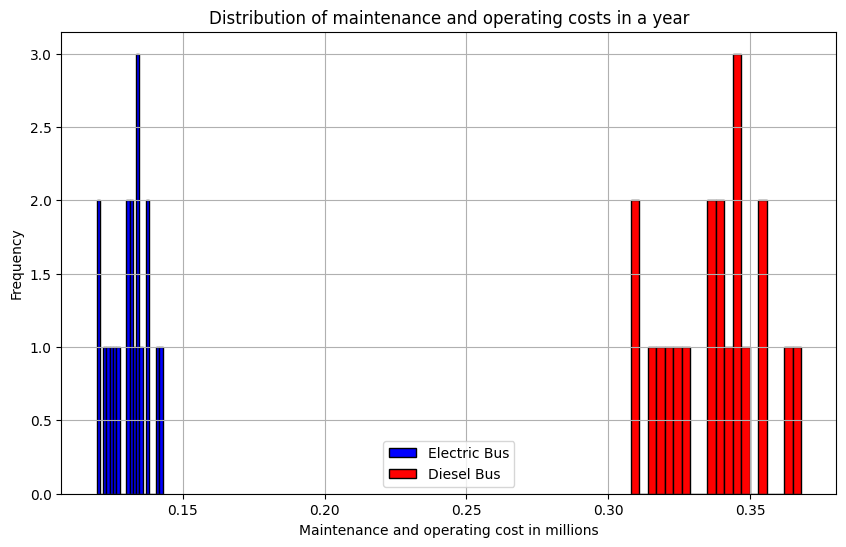

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(year_df['Electric_Maintenance and Operation Cost'], bins=20, color='blue', edgecolor='black', label = 'Electric Bus') # Changed column name to match year_df
plt.hist(year_df['Diesel Bus Maintenance and Operation Cost'], bins=20, color='red', edgecolor='black', label = 'Diesel Bus')
plt.xlabel('Maintenance and operating cost in millions')
plt.ylabel('Frequency')
plt.title('Distribution of maintenance and operating costs in a year')
plt.legend()
plt.grid(True)
plt.show()

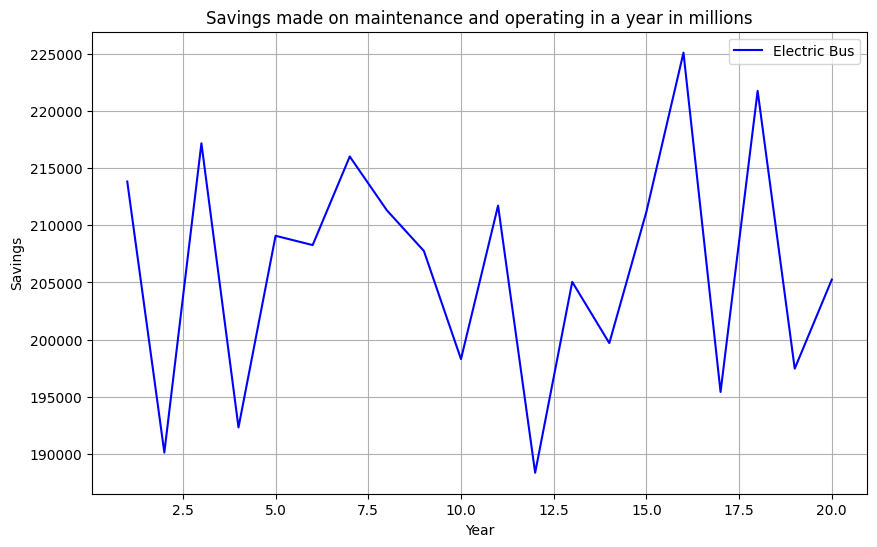

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(year_df['Year'], year_df['Savings'], label='Electric Bus', color='blue')
plt.xlabel('Year')
plt.ylabel('Savings')
plt.title('Savings made on maintenance and operating in a year')
plt.legend()
plt.grid(True)
plt.show()

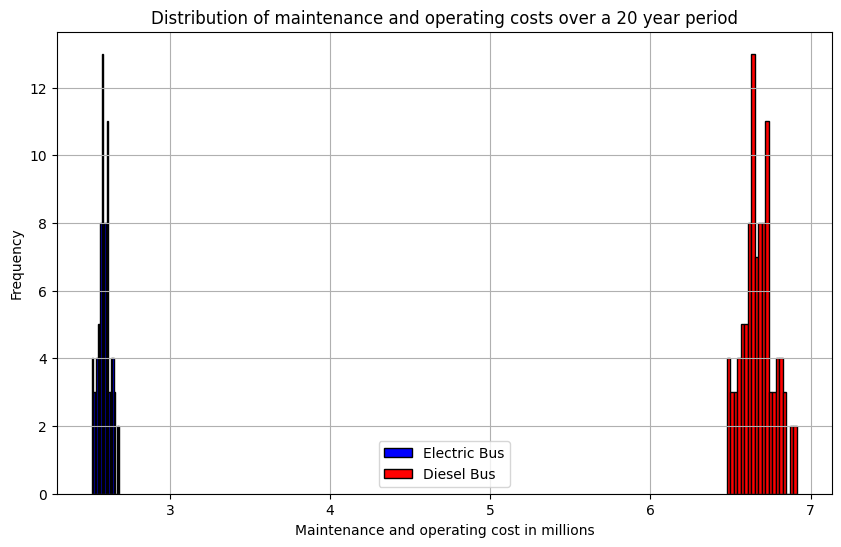

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(simulation_df['Electric Bus Maintenance and Operating Cost'], bins=20, color='blue', edgecolor='black', label = 'Electric Bus')
plt.hist(simulation_df['Diesel Bus Maintenance and Operating Cost'], bins=20, color='red', edgecolor='black', label = 'Diesel Bus')
plt.xlabel('Maintenance and operating cost in millions')
plt.ylabel('Frequency')
plt.title('Distribution of maintenance and operating costs over a 20 year period')
plt.legend()
plt.grid(True)
plt.show()

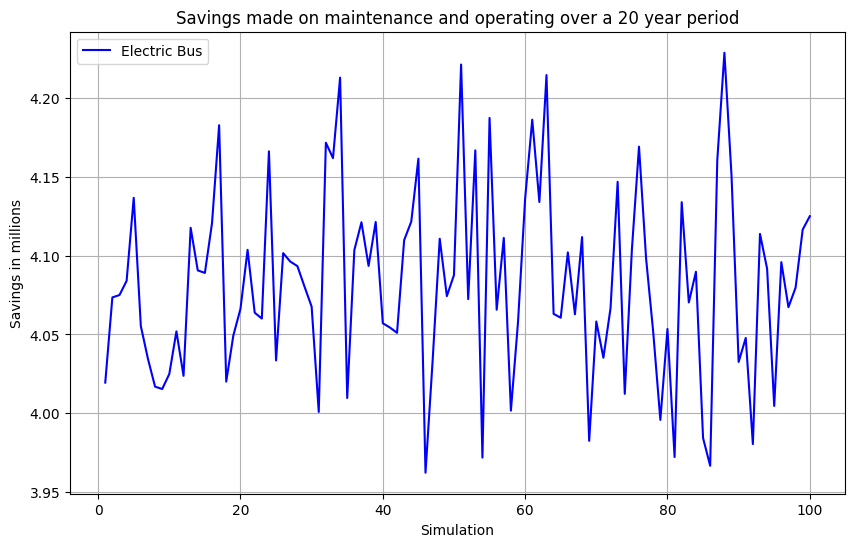

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(simulation_df['Simulation'], simulation_df['Total Savings'], label='Electric Bus', color='blue')
plt.xlabel('Simulation')
plt.ylabel('Savings in millions')
plt.title('Savings made on maintenance and operating over a 20 year period')
plt.legend()
plt.grid(True)
plt.show()

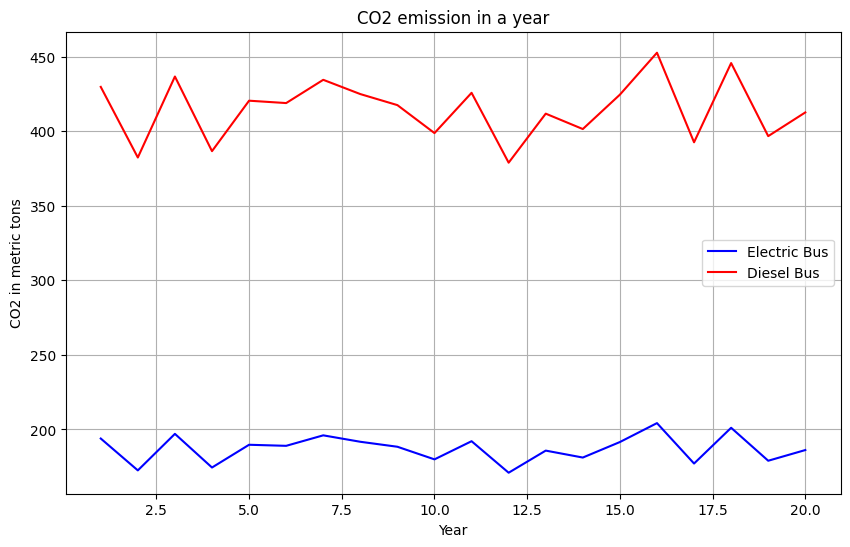

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(year_df['Year'], year_df['Electric Bus CO2'], label='Electric Bus', color='blue')
plt.plot(year_df['Year'], year_df['Diesel Bus CO2'], label='Diesel Bus', color='red')
plt.xlabel('Year')
plt.ylabel('CO2 in metric tons')
plt.title('CO2 emission in a year')
plt.legend()
plt.grid(True)
plt.show()

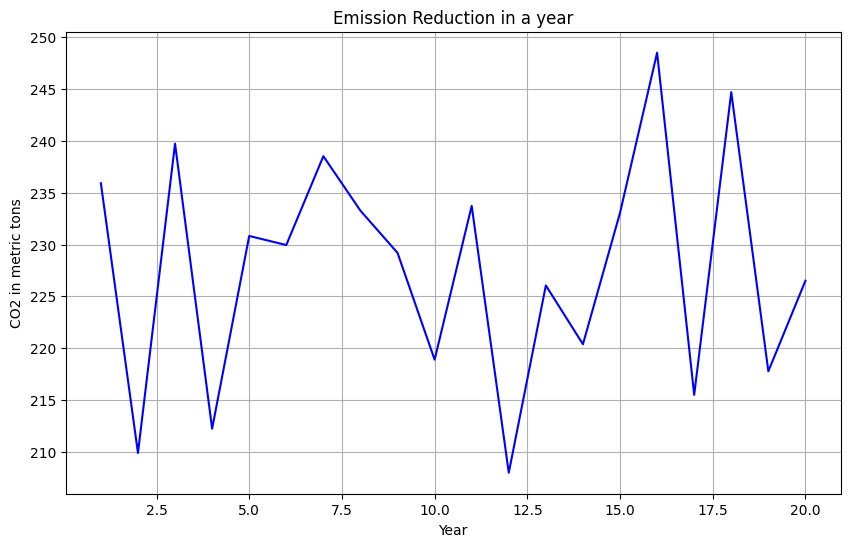

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(year_df['Year'], year_df['Emission Reduction'], color='blue')
plt.xlabel('Year')
plt.ylabel('CO2 in metric tons')
plt.title('Emission Reduction in a year')
plt.grid(True)
plt.show()

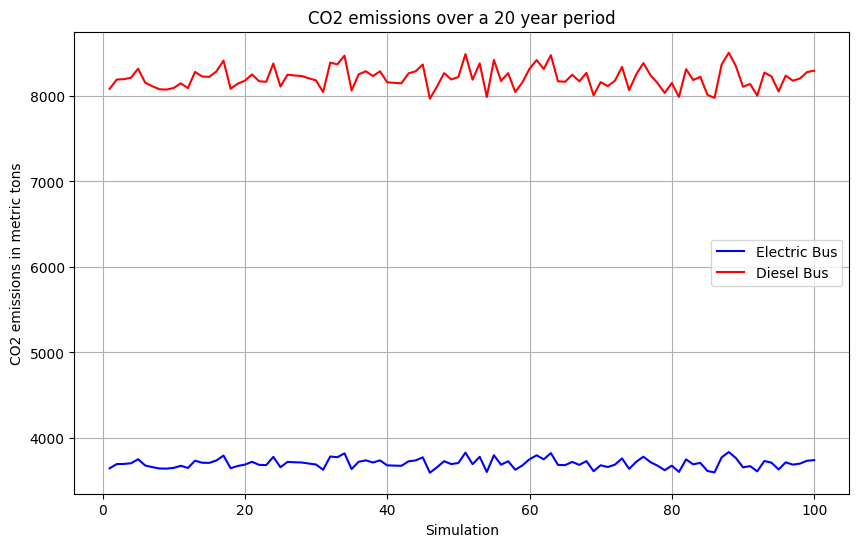

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(simulation_df['Simulation'], simulation_df['Total Electric Bus CO2'], label='Electric Bus', color='blue')
plt.plot(simulation_df['Simulation'], simulation_df['Total Diesel Bus CO2'], label='Diesel Bus', color='red')
plt.xlabel('Simulation')
plt.ylabel('CO2 emissions in metric tons')
plt.title('CO2 emissions over a 20 year period')
plt.legend()
plt.grid(True)
plt.show()

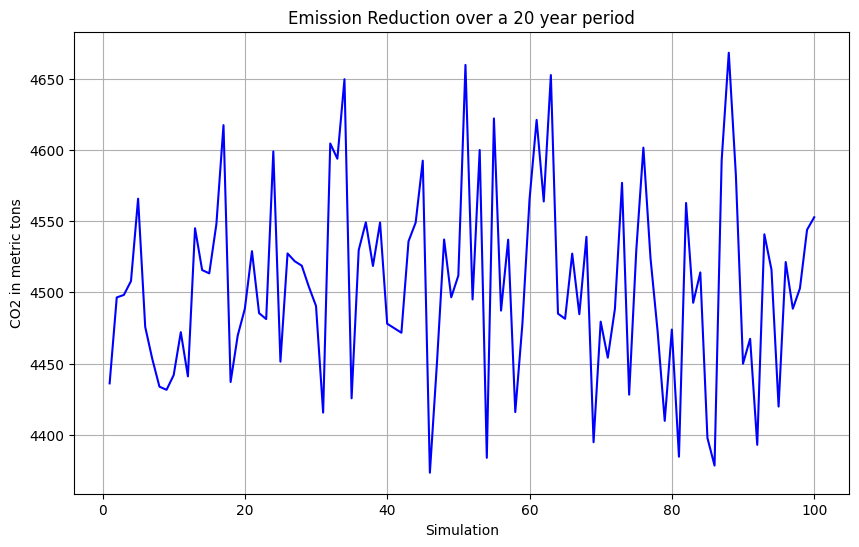

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(simulation_df['Simulation'], simulation_df['Total Emission Reduction'], color='blue')
plt.xlabel('Simulation')
plt.ylabel('CO2 in metric tons')
plt.title('Emission Reduction over a 20 year period')
plt.grid(True)
plt.show()